## Початкове завантаження бібліотек та датасету

In [1]:
# Завантажеємо початкові модулі
from keras.datasets import mnist
import tensorflow as tf 
from tensorflow import keras 
from keras.preprocessing import image
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from PIL import Image
import cv2

In [2]:
# Завантажуємо датасет
(X_train, y_train), (X_test, y_test) = mnist.load_data()

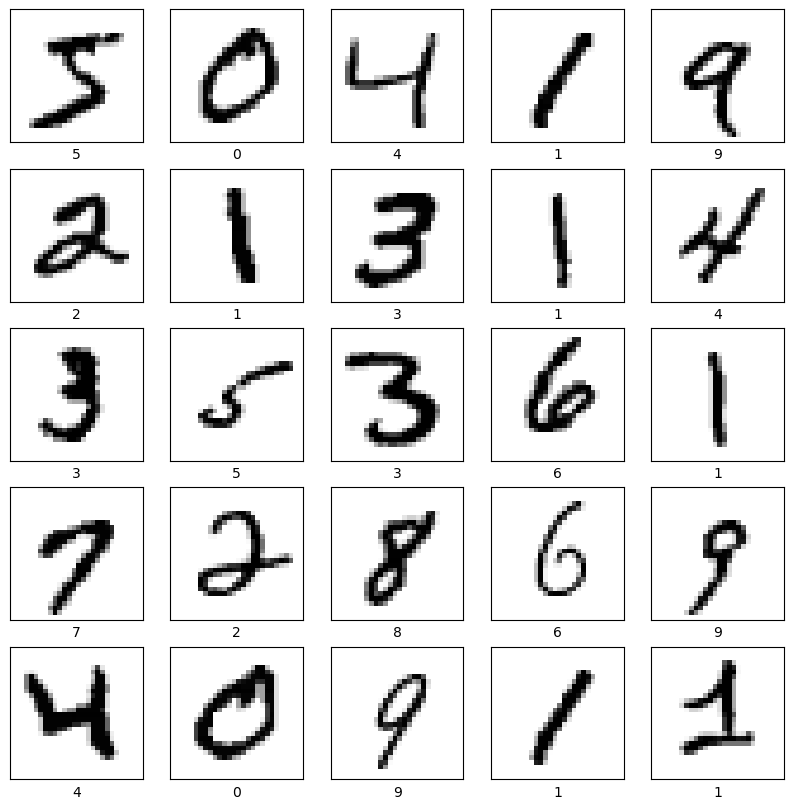

In [3]:
# Відобразимо частину тренувальних даних в форматі 5x5
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Робота з нейронною мережею

In [4]:
# Нормалізація даних
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# Створення нейронної мережі
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Компіляція моделі
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Тренування моделі
history = model.fit(X_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy: ", test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9050 - loss: 0.3108
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9862 - loss: 0.0434
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9907 - loss: 0.0285
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9942 - loss: 0.0188
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9946 - loss: 0.0165
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9868 - loss: 0.0443
Test accuracy:  0.9896000027656555


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


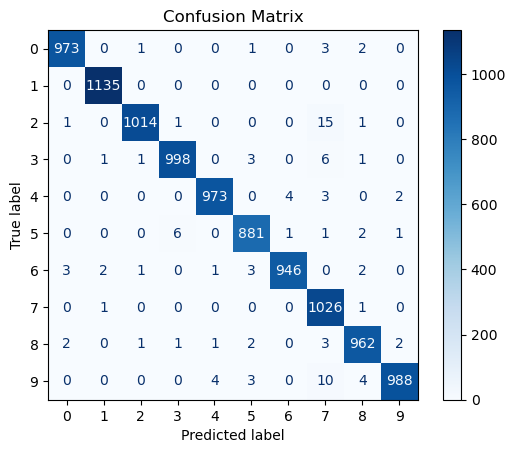

In [8]:
# Передбачення на тестовому наборі
predicted = model.predict(X_test)
predicted_classes = np.argmax(predicted, axis=1)
# Обчислення матриці невідповідностей
confusion_matrix = metrics.confusion_matrix(y_test, predicted_classes)
# Відображення матриці невідповідностей
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=np.unique(y_test))
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Передбачення за власним зображенням
path = 'image.jpg'
original_image = cv2.imread(path, 0)
predictions = []
small_image_size = (28, 28)

# Розділення зображення на менші зображення
for i in range(original_image.shape[1] // 28):
    left = i * small_image_size[0]
    upper = 0
    right = left + small_image_size[0]
    lower = upper + small_image_size[1]
    # Обрізання зображення
    small_image = original_image[upper:lower, left:right]
    # Оброблення маленького зображення
    image = 255 - small_image  # Інвертування зображення
    image = cv2.resize(image, small_image_size)  # Змінення розміру до 28x28
    image = image.reshape((1, 28, 28))  # Зміна форми для введення моделі
    image = image / 255.0  # Нормалізація даних
    # Передбачення на наших зображеннях
    pred = list(model.predict(image)[0])
    predictions.append(pred.index(max(pred)))

# Виводимо передбачення
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[3, 1, 2]
